In [1]:
# requirements
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv

# Datasets

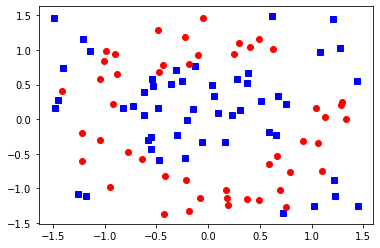

In [2]:
# dataset 1
np.random.seed(123)
n = 100
x_d1 = 3 * (np.random.rand(n, 2)-0.5)
radius = x_d1[:,0]**2 + x_d1[:,1]**2
y_d1 = (radius > 0.7 + 0.1 * np.random.randn(n)) &( radius < 2.2 + 0.1 * np.random.randn(n))
y_d1 = 2 * y_d1 -1

plt.plot(x_d1[y_d1 < 0, 0],  x_d1[y_d1 < 0, 1], 'bs')
plt.plot(x_d1[y_d1 > 0, 0],  x_d1[y_d1 > 0, 1], 'ro')

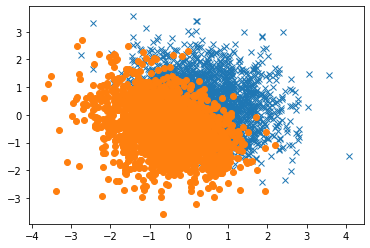

In [3]:
# dataset 2
n = 4000
omega = np.random.randn()
noise = 0.8 * np.random.randn(n)

x_d2 = np.random.randn(n, 2) + 0
y_d2 = 2 * (omega * x_d2[:,0] + x_d2[:,1] + noise > 0) - 1

plt.plot(np.extract(y_d2>0,x_d2[:,0]),np.extract(y_d2>0,x_d2[:,1]), 'x')
plt.plot(np.extract(y_d2<0,x_d2[:,0]),np.extract(y_d2<0,x_d2[:,1]), 'o')

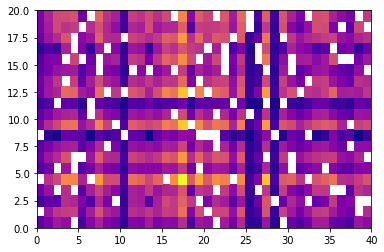

In [4]:
#dataset3
np.random.seed(1234)
m = 20
n = 40
r = 2
A = np.dot(np.random.rand(m, r), np.random.rand(r, n)).flatten()
ninc = 100
Q = np.random.permutation(m * n)[:ninc]
A[Q] = None
A = A.reshape(m, n)

plt.pcolor(A, cmap=plt.cm.plasma)

In [5]:
# dataset 4
n = 200
x_d4 = 3 * (np.random.rand(n, 4) - 0.5)
y_d4 = (2 * x_d4[:, 0] - 1 * x_d4[:,1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y_d4 = 2 * y_d4 -1

In [6]:
# dataset 5
n = 200
x_d5 = 3 * (np.random.rand(n, 4) - 0.5)
W = np.array([[ 2,  -1, 0.5,],
              [-3,   2,   1,],
              [ 1,   2,   3]])
y_d5 = np.argmax(np.dot(np.hstack([x_d5[:,:2], np.ones((n, 1))]), W.T)
                        + 0.5 * np.random.randn(n, 3), axis=1)

In [7]:
# dataset 6
d_d6 = 200
n_d6 = 180

# we consider 5 groups where each group has 40 attributes
groupSize = 5
attrSize = 40
g_d6 = np.arange(groupSize*attrSize).reshape(groupSize,-1)

x_d6 = np.random.randn(n_d6, d_d6)
noise_d6 = 0.5

# we consider feature in group 1 and group 2 is activated.
w_d6 = np.vstack([20 * np.random.randn(80, 1),
                 np.zeros((120, 1)),
                 5 * np.random.rand()])
x_d6_tilde = np.hstack([x_d6, np.ones((n_d6, 1))])
y_d6 = np.dot(x_d6_tilde, w_d6) + noise_d6 * np.random.randn(n_d6, 1)

# Problem 1

In [214]:
# requirement
import numpy as np
import matplotlib.pyplot as plt
import cvxpy


In [215]:
# dataset 4
np.random.seed(123)
n = 200
x_d4 = 3 * (np.random.rand(n, 4) - 0.5)
y_d4 = (2 * x_d4[:, 0] - 1 * x_d4[:,1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y_d4 = 2 * y_d4 -1

In [216]:
def J(w, X, y, lmd):
    return np.sum(np.log(1 + np.exp(-y * X@w))) + lmd * w.T@w 

def grad(w, X, y, lmd):
    return 1/len(X) * np.sum(np.exp(-y * X@w) * (-y * X) / (1 + np.exp(-y * X@w)), axis=0).reshape(-1, 1) + 2*lmd*w

def hess(w, X, y, lmd):
    return 1/len(X) * np.sum(np.exp(-y * X@w) / (1 + np.exp(-y * X@w))**2 * X@X.T) + 2*lmd*np.eye(4)

In [217]:
loss_hist_batch = [] # to store the history of loss J(w_t)
w = np.ones((4, 1))
X = x_d4
y = y_d4.reshape(200, 1)
lmd = 0.1

# implement batch steepest gradient method here

#steepest gradient method
def steepest_gradient(w, X, y, lmd, lr = 0.1):
    loss_hist_batch.append(J(w, X, y, lmd)[0][0])
    for i in range(300):
        w -= lr * grad(w, X, y, lmd)
        loss_hist_batch.append(J(w, X, y, lmd)[0][0])

#fitting
steepest_gradient(w, X, y, lmd)

w_opt = w

In [218]:
loss_hist_newton = [] # to store the history of loss J(w_t)
w = np.ones((4, 1))
X = x_d4
y = y_d4.reshape(200, 1)
lmd = 0.1

# implement Newton based method here
#newton method
def newton(w, X, y, lmd, lr=0.1):
    loss_hist_newton.append(J(w, X, y, lmd)[0][0])
    for i in range(300):
        w -= lr * np.linalg.inv(hess(w, X, y, lmd))@grad(w, X, y, lmd)
        loss_hist_newton.append(J(w, X, y, lmd)[0][0])

#fitting
newton(w, X, y, lmd)

w_opt = w

/Users/qitengdazhi/anaconda3/envs/cv2test/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/Users/qitengdazhi/anaconda3/envs/cv2test/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/qitengdazhi/anaconda3/envs/cv2test/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


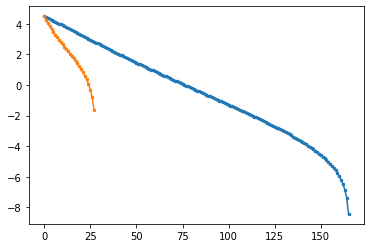

In [219]:
#plot
loss_hist_batch = np.log(np.array(loss_hist_batch) - J(w_opt, X, y, lmd)[0][0])
loss_hist_newton = np.log(np.array(loss_hist_newton) - J(w_opt, X, y, lmd)[0][0])

plt.plot(loss_hist_batch, marker=".", markersize=5)
plt.plot(loss_hist_newton, marker=".", markersize=5)

In [220]:
# dataset 5
n = 200
x_d5 = 3 * (np.random.rand(n, 4) - 0.5)
W = np.array([[ 2,  -1, 0.5,],
              [-3,   2,   1,],
              [ 1,   2,   3]])
y_d5 = np.argmax(np.dot(np.hstack([x_d5[:,:2], np.ones((n, 1))]), W.T)
                        + 0.5 * np.random.randn(n, 3), axis=1)

In [224]:
X = x_d5
one_hot = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
y = []
for i in range(len(y_d5)):
    y.append(one_hot[y_d5[i]])
y = np.array(y)
lmd = 0.1

In [225]:
def J(w, X, y, lmd):
    return np.sum(np.log(1 + np.exp(-y * (X@w)))) + np.sum(lmd * w * w)

def grad(w, X, y, lmd):
    return -1/len(X) * (np.sum(np.exp(-y * (X@w)) / (1 + np.exp(-y * (X@w))), axis=1).reshape(-1, 1)*X).T@y  + 2*lmd*w

def hess(w, X, y, lmd):
    return 1/len(X) * (np.sum(np.exp(-y * (X@w)) / (1 + np.exp(-y * (X@w)))**2, axis=1).reshape(-1, 1)*X).T@y@y.T@X + 2*lmd*np.eye(4)

In [226]:
loss_hist_batch = [] # to store the history of loss J(w_t)
w = np.ones((4, 3))

# implement batch steepest gradient method here
#steepest gradient method
def steepest_gradient(w, X, y, lmd, lr = 0.2):
    loss_hist_batch.append(J(w, X, y, lmd))
    for i in range(400):
        w -= lr * grad(w, X, y, lmd)
        loss_hist_batch.append(J(w, X, y, lmd))

#fitting
steepest_gradient(w, X, y, lmd)

w_opt = w

In [227]:
loss_hist_newton = [] # to store the history of loss J(w_t)
w = np.ones((4, 3))

# implement Newton based method here
#newton method
def newton(w, X, y, lmd, lr=0.2):
    loss_hist_newton.append(J(w, X, y, lmd))
    for i in range(400):
        w -= lr * np.linalg.inv(hess(w, X, y, lmd))@grad(w, X, y, lmd)
        loss_hist_newton.append(J(w, X, y, lmd))

#fitting
newton(w, X, y, lmd)

w_opt = w

/Users/qitengdazhi/anaconda3/envs/cv2test/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/Users/qitengdazhi/anaconda3/envs/cv2test/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


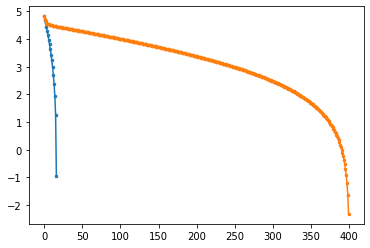

In [228]:
#plot
loss_hist_batch = np.log(np.array(loss_hist_batch) - J(w_opt, X, y, lmd))
loss_hist_newton = np.log(np.array(loss_hist_newton) - J(w_opt, X, y, lmd))

plt.plot(loss_hist_batch, marker=".", markersize=5)
plt.plot(loss_hist_newton, marker=".", markersize=5)

# Problem 2

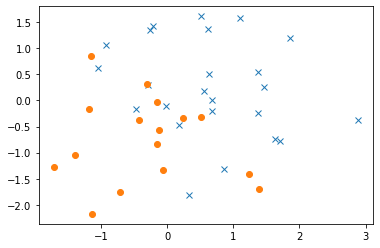

In [29]:
# requirement
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv

# prepare dataset
np.random.seed(3846)
n = 40
omega = np.random.randn()
noise = 0.8 * np.random.randn(n)

x = np.random.randn(n, 2) + 0
y = 2 * (omega * x[:,0] + x[:,1] + noise > 0) - 1

plt.plot(np.extract(y>0,x[:,0]),np.extract(y>0,x[:,1]), 'x')
plt.plot(np.extract(y<0,x[:,0]),np.extract(y<0,x[:,1]), 'o')

In [30]:
def prox_l1(mu, w):
    w_proj = np.zeros(mu.shape)
    for i in range(len(mu)):
        if mu[i] > w:
            w_proj[i] = mu[i] - w
        else:
            if np.abs(mu[i]) < w:
                w_proj[i] = 0
            else:
                w_proj[i] = mu[i] + w 
    return w_proj

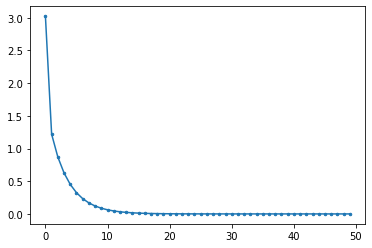

In [41]:
#パラメータ
lam = 2
#lam = 4
#lam = 6 

A = np.array([[  3, 0.5],
              [0.5,   1]])
mu = np.array([[1],
               [2]])

x_init = np.array([[ 3],
                   [-1]])

#最大固有値
L = 1.01 * np.max(np.linalg.eig(2 * A)[0])

x_hist = []
xt = x_init
for t in range(50):
    x_hist.append(xt.T)
    grad = 2 * np.dot(A, xt-mu)
    xth = xt - 1/L * grad
    xt = prox_l1(xth, lam * 1 / L)

x_hist = np.vstack(x_hist)

diff = np.linalg.norm(x_hist - x_hist[-1], axis=1)
  
plt.plot(diff, marker=".", markersize=5)

/Users/qitengdazhi/anaconda3/envs/cv2test/lib/python3.7/site-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


(-1.5, 2.5)

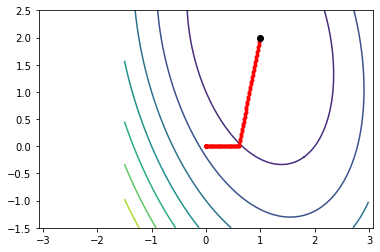

In [57]:
#パラメータ
lams = np.arange(0, 10, 0.1)

A = np.array([[  3, 0.5],
              [0.5,   1]])
mu = np.array([[1],
               [2]])

x_init = np.array([[ 3],
                   [-1]])

#最大固有値
L = 1.01 * np.max(np.linalg.eig(2 * A)[0])
x1 = []
x2 = []

for lam in lams:
    x_hist = []
    xt = x_init
    for t in range(1000):
        x_hist.append(xt.T)
        grad = 2 * np.dot(A, xt-mu)
        xth = xt - 1/L * grad
        xt = prox_l1(xth, lam * 1 / L)

    x_hist = np.vstack(x_hist)
    x1.append(x_hist[-1, 0])
    x2.append(x_hist[-1, 1])
    
#cvxで結果確認
x_1 = np.arange(-1.5, 3, 0.01)
x_2 = np.arange(-1.5, 3, 0.02)

X1, X2 = np.mgrid[-1.5:3:0.01, -1.5:3:0.02]
fValue = np.zeros((len(x_1), len(x_2)))

A = np.array([[  3, 0.5],
              [0.5,   1]])
mu = np.array([[1],
               [2]])

for i in range(len(x_1)):
      for j in range(len(x_2)):
            w = np.vstack([x_1[i], x_2[j]])
            fValue[i, j] = np.dot(np.dot((w-mu).T, A), (w-mu))

# cvx
w_lasso = cv.Variable((2,1))
obj_fn = cv.quad_form(w_lasso - mu, A)
objective = cv.Minimize(obj_fn)
constraints = []
prob = cv.Problem(objective, constraints)
result = prob.solve(solver=cv.CVXOPT) 
w_lasso = w_lasso.value

plt.contour(X1, X2, fValue)

plt.plot(x1, x2, 'ro-', markersize=3, linewidth=0.5)
plt.plot(w_lasso[0], w_lasso[1], 'ko')

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 2.5)